In [46]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

phi, phi_0, r_tsa, L_tsa0 = symbols('phi, phi_0, r_tsa, L_tsa0') #twisted string params
x_tsa, r1, r2, r12, r3, theta3 = symbols('x_tsa, r1, r2, r12, r3, theta3') #linkage params
k, F_spr0 = symbols('k, F_spr0') #spring params

L_tsa = sqrt(L_tsa0**2 - (phi + phi_0)**2 * r_tsa**2)

theta1 = acos((-r1**2 - x_tsa**2 + L_tsa**2) / (2*r1*x_tsa))
theta2 = theta1 - acos((r1**2 + r2**2 - r12**2) / (2*r1*r2))

L_spr = sqrt(r2**2 + r3**2 - 2*r2*r3*cos(theta2 - theta3))
L_spr

sqrt(r2**2 - 2*r2*r3*cos(theta3 + acos((r1**2 - r12**2 + r2**2)/(2*r1*r2)) - acos((L_tsa0**2 - r1**2 - r_tsa**2*(phi + phi_0)**2 - x_tsa**2)/(2*r1*x_tsa))) + r3**2)

In [47]:
L_dspr = L_spr - L_spr.subs(phi,0)
L_dspr

sqrt(r2**2 - 2*r2*r3*cos(theta3 + acos((r1**2 - r12**2 + r2**2)/(2*r1*r2)) - acos((L_tsa0**2 - r1**2 - r_tsa**2*(phi + phi_0)**2 - x_tsa**2)/(2*r1*x_tsa))) + r3**2) - sqrt(r2**2 - 2*r2*r3*cos(theta3 + acos((r1**2 - r12**2 + r2**2)/(2*r1*r2)) - acos((L_tsa0**2 - phi_0**2*r_tsa**2 - r1**2 - x_tsa**2)/(2*r1*x_tsa))) + r3**2)

In [48]:
F_out = k*L_dspr + F_spr0
F_out

F_spr0 + k*(sqrt(r2**2 - 2*r2*r3*cos(theta3 + acos((r1**2 - r12**2 + r2**2)/(2*r1*r2)) - acos((L_tsa0**2 - r1**2 - r_tsa**2*(phi + phi_0)**2 - x_tsa**2)/(2*r1*x_tsa))) + r3**2) - sqrt(r2**2 - 2*r2*r3*cos(theta3 + acos((r1**2 - r12**2 + r2**2)/(2*r1*r2)) - acos((L_tsa0**2 - phi_0**2*r_tsa**2 - r1**2 - x_tsa**2)/(2*r1*x_tsa))) + r3**2))

In [49]:
T1 = L_spr.diff(phi)
T1

-r2*r3*r_tsa**2*(2*phi + 2*phi_0)*sin(theta3 + acos((r1**2 - r12**2 + r2**2)/(2*r1*r2)) - acos((L_tsa0**2 - r1**2 - r_tsa**2*(phi + phi_0)**2 - x_tsa**2)/(2*r1*x_tsa)))/(2*r1*x_tsa*sqrt(1 - (L_tsa0**2 - r1**2 - r_tsa**2*(phi + phi_0)**2 - x_tsa**2)**2/(4*r1**2*x_tsa**2))*sqrt(r2**2 - 2*r2*r3*cos(theta3 + acos((r1**2 - r12**2 + r2**2)/(2*r1*r2)) - acos((L_tsa0**2 - r1**2 - r_tsa**2*(phi + phi_0)**2 - x_tsa**2)/(2*r1*x_tsa))) + r3**2))

In [50]:
F_in = F_out*T1
F_in

-r2*r3*r_tsa**2*(F_spr0 + k*(sqrt(r2**2 - 2*r2*r3*cos(theta3 + acos((r1**2 - r12**2 + r2**2)/(2*r1*r2)) - acos((L_tsa0**2 - r1**2 - r_tsa**2*(phi + phi_0)**2 - x_tsa**2)/(2*r1*x_tsa))) + r3**2) - sqrt(r2**2 - 2*r2*r3*cos(theta3 + acos((r1**2 - r12**2 + r2**2)/(2*r1*r2)) - acos((L_tsa0**2 - phi_0**2*r_tsa**2 - r1**2 - x_tsa**2)/(2*r1*x_tsa))) + r3**2)))*(2*phi + 2*phi_0)*sin(theta3 + acos((r1**2 - r12**2 + r2**2)/(2*r1*r2)) - acos((L_tsa0**2 - r1**2 - r_tsa**2*(phi + phi_0)**2 - x_tsa**2)/(2*r1*x_tsa)))/(2*r1*x_tsa*sqrt(1 - (L_tsa0**2 - r1**2 - r_tsa**2*(phi + phi_0)**2 - x_tsa**2)**2/(4*r1**2*x_tsa**2))*sqrt(r2**2 - 2*r2*r3*cos(theta3 + acos((r1**2 - r12**2 + r2**2)/(2*r1*r2)) - acos((L_tsa0**2 - r1**2 - r_tsa**2*(phi + phi_0)**2 - x_tsa**2)/(2*r1*x_tsa))) + r3**2))

1.3539985278220026


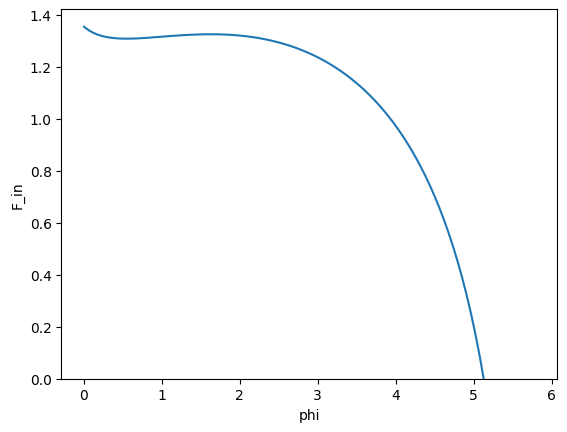

In [70]:
nums = {
    r_tsa: 0.392,
    phi_0: 1.4,
    L_tsa0: 2.84,
    F_spr0: 3.84,
    k: 2.9,
    r1: 1.422,
    r2: 1.18,
    r3: 1.32382,
    theta3: -1.3808,
    x_tsa: 1.4,
    r12: 0.66
}


phi_max = float((L_tsa0/r_tsa - phi_0).subs(nums))
phi_vals = np.linspace(0, phi_max, 100, endpoint=False)

F_in_vals = [float(F_in.subs(nums).subs(phi, phi_val)) for phi_val in phi_vals]

print(max(F_in_vals))

plt.plot(phi_vals, F_in_vals)
plt.ylim(0, 1.05*max(F_in_vals))
plt.xlabel('phi')
plt.ylabel('F_in')
plt.show()